### 01. How to define numpy,matplotlib and tensorflow?

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### 02. How to load MNIST dataset?

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### 03. How to normalize?

In [4]:
np.float(np.max(x_train))

255.0

In [5]:
x_train = x_train/np.float(np.max(x_train))
x_test = x_test/np.float(np.max(x_test))

### 04. How to make dataset serialization?

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])

In [8]:
x_train.shape

(60000, 784)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [11]:
y_test.shape

(10000,)

### 05. How to define model?

In [12]:
model = tf.keras.models.Sequential()

#### [05.01 Use Xavier normal initial](https://keras.io/api/layers/initializers/#glorotnormal-class)

In [13]:
model.add(tf.keras.layers.Dense(units=512,input_dim=784,activation='relu',kernel_initializer= tf.keras.initializers.GlorotNormal()))

#### 05.02. Dropout 

In [14]:
model.add(tf.keras.layers.Dropout(0.5))

In [15]:
model.add(tf.keras.layers.Dense(units=10,input_dim=512,kernel_initializer= tf.keras.initializers.GlorotNormal(),activation='softmax'))

### 06. How to define adam for optimizer?

In [16]:
adam = tf.keras.optimizers.Adam(0.01)

### 7. How to compile(not one-hot encoding) ?

In [17]:
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['acc'])

### 06. How to visualize summary?

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 07. How to do fitting?

In [19]:
history = model.fit(x_train,y_train,batch_size=32,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 73us/sample - loss: 0.4831 - acc: 0.8653
Epoch 2/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4094 - acc: 0.8950
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.4003 - acc: 0.9040


In [20]:
model.predict(x_test)[0]

array([4.3441001e-30, 4.4110556e-18, 7.1304893e-12, 5.5732858e-12,
       9.4267692e-22, 7.0948119e-19, 2.9726660e-36, 1.0000000e+00,
       5.9200401e-30, 3.6751374e-14], dtype=float32)

### 08. How to draw loss graph?

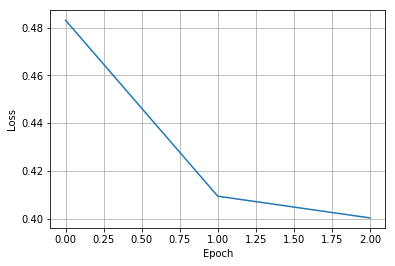

In [21]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()

### 09. How to draw accuracy graph?

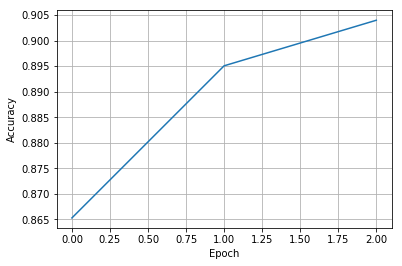

In [22]:
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

### 10.How to evaluate ?

In [23]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.20485666838148608, 0.9504]